In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '/Users/gary/data_marathon/Part01'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [5]:
app_train.select_dtypes(exclude=["object"]).head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
app_train.select_dtypes(exclude=["object"]).describe().loc['mean']

SK_ID_CURR                     278180.518577
TARGET                              0.080729
CNT_CHILDREN                        0.417052
AMT_INCOME_TOTAL               168797.919297
AMT_CREDIT                     599025.999706
AMT_ANNUITY                     27108.573909
AMT_GOODS_PRICE                538396.207429
REGION_POPULATION_RELATIVE          0.020868
DAYS_BIRTH                     -16036.995067
DAYS_EMPLOYED                   63815.045904
DAYS_REGISTRATION               -4986.120328
DAYS_ID_PUBLISH                 -2994.202373
OWN_CAR_AGE                        12.061091
FLAG_MOBIL                          0.999997
FLAG_EMP_PHONE                      0.819889
FLAG_WORK_PHONE                     0.199368
FLAG_CONT_MOBILE                    0.998133
FLAG_PHONE                          0.281066
FLAG_EMAIL                          0.056720
CNT_FAM_MEMBERS                     2.152665
REGION_RATING_CLIENT                2.052463
REGION_RATING_CLIENT_W_CITY         2.031521
HOUR_APPR_

In [11]:
app_train.select_dtypes(include=["float"]).columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

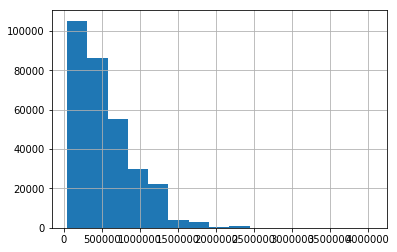

In [22]:
app_train['AMT_GOODS_PRICE'].hist(bins=15)

In [27]:
np.array(app_train['AMT_GOODS_PRICE'])

array([  351000.,  1129500.,   135000., ...,   585000.,   319500.,
         675000.])

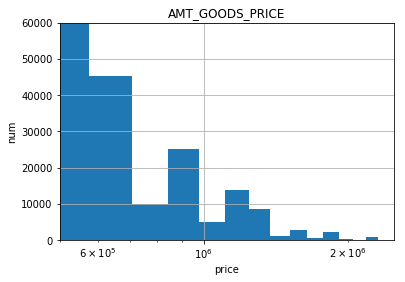

In [43]:
plt.hist(np.array(app_train['AMT_GOODS_PRICE'].dropna()), bins=30)
plt.xlabel('price')
plt.ylabel('num')
plt.title('AMT_GOODS_PRICE')
plt.axis([500000, 2500000, 0, 60000])
# plt.xticks(np.linspace(500000, 1500000, 15))
plt.grid(True)
plt.xscale('log')
plt.show()